Let's make a cool tutorial!

In [1]:
from astropy.utils.data import download_file
from astropy.io import fits

In [2]:
import os

if not os.path.isfile('TAN_C14.fits'):
    hi_datafile = download_file('http://cdsarc.u-strasbg.fr/vizier/ftp/cats/J/A+A/594/A116/CUBES/GAL/TAN/TAN_C14.fits',
                       cache=True)
else:
    hi_data = 'TAN_C14.fits'

#hi_datafile = download_file('http://cdsarc.u-strasbg.fr/vizier/ftp/cats/J/A+A/594/A116/CUBES/GAL/TAN/TAN_C14.fits', 
                        #cache=True )

hi_data = fits.open(hi_datafile)

In [3]:
from spectral_cube import SpectralCube


In [4]:
cube = SpectralCube.read(hi_data)
hi_data.close()

/Users/DK/anaconda/envs/dk/lib/python3.6/site-packages/spectral_cube/spectral_cube.py:238: UserWarning: radio_beam is not installed. No beam can be created.
  warnings.warn("radio_beam is not installed. No beam "
/Users/DK/anaconda/envs/dk/lib/python3.6/site-packages/spectral_cube/spectral_cube.py:246: UserWarning: Could not parse beam information from header.  Exception was: UnboundLocalError("local variable 'Beam' referenced before assignment",)
  "  Exception was: {0}".format(ex.__repr__()))


In [5]:
cube

SpectralCube with shape=(933, 277, 269) and unit=K:
 n_x:    269  type_x: GLON-TAN  unit_x: deg    range:   286.707162 deg:  320.913024 deg
 n_y:    277  type_y: GLAT-TAN  unit_y: deg    range:   -51.659734 deg:  -28.394756 deg
 n_s:    933  type_s: VRAD      unit_s: m / s  range:  -600207.218 m / s:  600409.133 m / s

In [6]:
from astropy import units as u
import astropy.coordinates as coord
from astroquery.esasky import ESASky
import astroquery
import numpy as np

In [7]:
result = ESASky.query_region_maps('SMC', radius = 1*u.deg, missions = 'Herschel')
print(result)

TableList with 1 tables:
	'0:HERSCHEL' with 11 column(s) and 24 row(s) 


In [8]:
filters = result['HERSCHEL']['filter'].astype(str)

ind = np.array(['250, 350, 500' == s for s in filters], dtype = 'bool')

target_obs = astroquery.utils.TableList({"HERSCHEL":result['HERSCHEL'][np.array(ind, dtype='bool')]})

In [9]:
images = ESASky.get_maps(target_obs)

Starting download of HERSCHEL data. (1 files)
INFO: Maps available at /Volumes/DK_Storage/Data/Tilted_Ring_data/model_cubes/Elliptical/tutorial/Maps [astroquery.esasky.core]


In [31]:
images['HERSCHEL'][0]['350'].info()

Filename: Maps/HERSCHEL/hspirepmw401_25pxmp_0110_m7303_1342198565_1342198566_1462476888800.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     184   ()      
  1  image         1 ImageHDU        47   (2407, 2141)   float64   
  2  error         1 ImageHDU        47   (2407, 2141)   float64   
  3  coverage      1 ImageHDU        47   (2407, 2141)   float64   
  4  History       1 ImageHDU        23   ()      
  5  HistoryScript    1 BinTableHDU     39   84R x 1C   [326A]   
  6  HistoryTasks    1 BinTableHDU     46   65R x 4C   [1K, 27A, 1K, 9A]   
  7  HistoryParameters    1 BinTableHDU     74   450R x 10C   [1K, 20A, 13A, 196A, 1L, 1K, 1L, 74A, 11A, 41A]   


In [32]:
from astropy.wcs import WCS

In [37]:
w = WCS(images['HERSCHEL'][0]['350'][0])
herschel_hdu = images['HERSCHEL'][0]['350'][1]
print(w)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 18.99666058287459  -71.828763749063185  
CRPIX : 1769.0  2527.0  
NAXIS : 0  0


In [38]:
import aplpy
import matplotlib.pyplot as plt
%matplotlib inline

INFO: Auto-setting vmin to -1.813e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.659e+01 [aplpy.core]


/Users/DK/anaconda/envs/dk/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


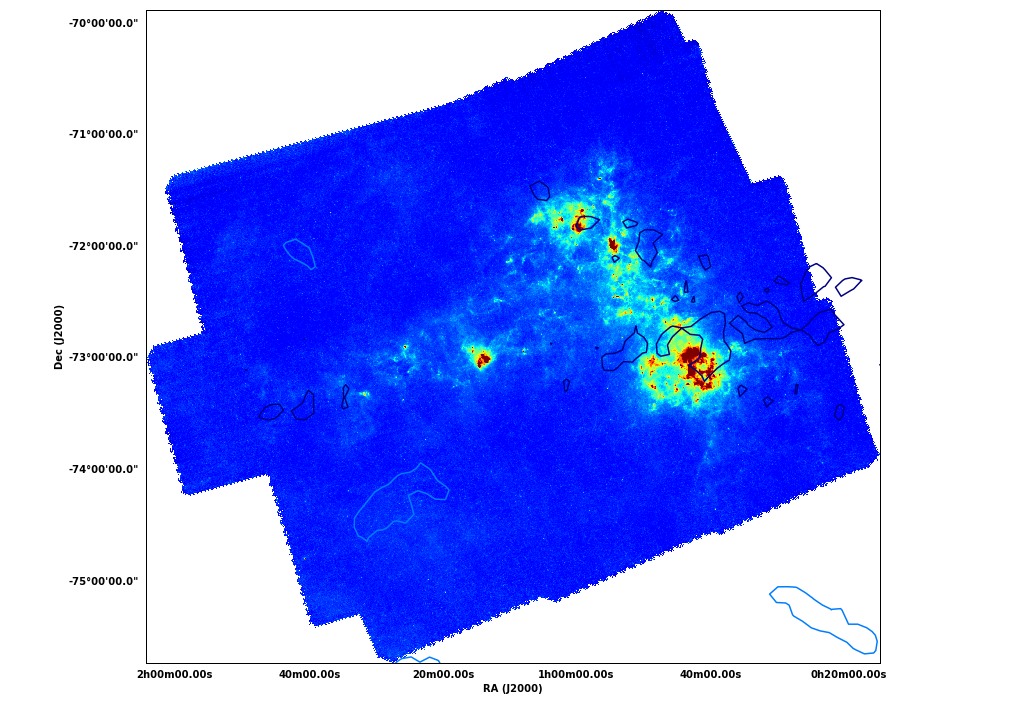

In [41]:
fig = plt.figure(figsize = (18,12))

F = aplpy.FITSFigure(herschel_hdu, figure = fig)

F.show_colorscale()
F.show_contour(cube.hdu, dimension = [0,1], slices = [450])

INFO: Auto-setting vmin to -4.660e+00 [aplpy.core]
INFO: Auto-setting vmax to  5.058e+01 [aplpy.core]


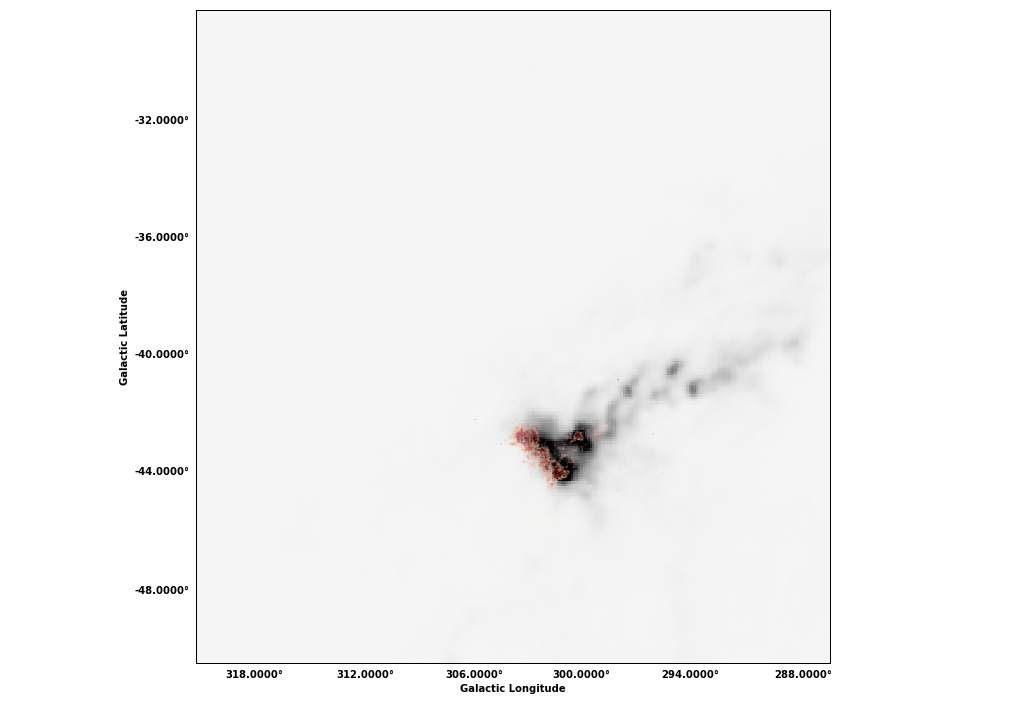

In [55]:
fig = plt.figure(figsize = (18,12))

F = aplpy.FITSFigure(cube.hdu, dimensions = [0,1], slices = [600], figure = fig)

F.show_colorscale(cmap = 'Greys')
F.show_contour(herschel_hdu, cmap = 'Reds', alpha = .2)

In [ ]:
result['HERSCHEL'][np.array(ind, dtype='bool')].show_in_notebook()

In [ ]:
images = ESASky.get_maps(astroquery.utils.TableList(result['HERSCHEL'][np.array(ind, dtype='bool')]), 
                         cache = False)

In [ ]:
type(images)

In [ ]:
table = result['HERSCHEL']
print(table)

In [ ]:
test = astroquery.utils.TableList(result['HERSCHEL'][np.array(ind, dtype='bool')])

In [ ]:
test['HERSCHEL'].show_in_notebook()

In [ ]:
test = astroquery.utils.TableList({"HERSCHEL":result['HERSCHEL'][np.array(ind, dtype='bool')]})